# Data Cleanning

### Visualização

In [1]:
import pandas as pd

dfClientes = pd.read_excel('caso_20211115.xlsx', sheet_name='clientes')
dfLojas = pd.read_excel('caso_20211115.xlsx', sheet_name='lojas')
dfProdutos = pd.read_excel('caso_20211115.xlsx', sheet_name='produtos')
dfVendas = pd.read_excel('caso_20211115.xlsx', sheet_name='vendas')
dfPag = pd.read_excel('caso_20211115.xlsx', sheet_name='pagamentos')


In [2]:
dfClientes.isnull().sum()

id         0
nome       4
sexo       4
dt_nasc    4
dtype: int64

In [3]:
dfClientes[dfClientes.isnull().T.any()]

,id,nome,sexo,dt_nasc
263,264,NaN,F,7/29/1997
264,265,NaN,M,2/7/1979
268,269,NaN,F,NaN
269,270,NaN,M,NaN
276,277,Brenda Santos,F,NaN
282,283,Amanda Barros,F,NaN
287,288,Victor Ribeiro,NaN,12/17/1974
290,291,Clara Pinto,NaN,12/25/1980
294,295,Tiago Lima,NaN,7/26/1973
301,302,Guilherme Cardoso,NaN,3/9/1998


In [4]:
dfClientes.sexo.unique()

array(['F', 'M', nan], dtype=object)

In [5]:
dfClientes[dfClientes.nome.isnull()]

,id,nome,sexo,dt_nasc
263,264,NaN,F,7/29/1997
264,265,NaN,M,2/7/1979
268,269,NaN,F,NaN
269,270,NaN,M,NaN


In [6]:
dfPag[dfPag.id==264]

,id,id_venda,dt_pgto
263,264,364,2018-05-21


### Tratando dados NaN

In [7]:
dfClientes.loc[dfClientes.nome.isnull(), 'nome'] = 'Sem Nome'
dfClientes.loc[dfClientes.sexo.isnull(), 'sexo'] = 'O'
dfClientes.loc[dfClientes.dt_nasc.isnull(), 'dt_nasc'] = '1/1/2021'

In [8]:
dfClientes[dfClientes.nome=='Sem Nome']

,id,nome,sexo,dt_nasc
263,264,Sem Nome,F,7/29/1997
264,265,Sem Nome,M,2/7/1979
268,269,Sem Nome,F,1/1/2021
269,270,Sem Nome,M,1/1/2021


In [9]:
dfClientes.isnull().sum()

id         0
nome       0
sexo       0
dt_nasc    0
dtype: int64

In [10]:
dfProdutos

,id,produto,valor
0,1,mouse,20.0
1,2,teclado,30.0
2,3,laptop básico,2300.0
3,4,laptop gamer,5300.0
4,5,monitor,1500.0
5,6,impressora,700.0
6,7,carregador,150.0
7,8,cadeira,540.0
8,9,mesa,860.0
9,10,xxx-231a,3211352.0


### Tratando Outliers

In [11]:
dfProdutos.loc[9, 'valor'] = dfProdutos.valor[9]/10000
dfProdutos

,id,produto,valor
0,1,mouse,20.0000
1,2,teclado,30.0000
2,3,laptop básico,2300.0000
3,4,laptop gamer,5300.0000
4,5,monitor,1500.0000
5,6,impressora,700.0000
6,7,carregador,150.0000
7,8,cadeira,540.0000
8,9,mesa,860.0000
9,10,xxx-231a,321.1352


<AxesSubplot:>

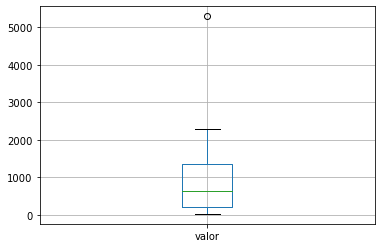

In [12]:
dfProdutos.boxplot(column=['valor'])

In [13]:
dfVendas[~dfVendas.id_cliente.isin(dfClientes.id)]

,id,id_cliente,id_loja,id_produto,dt_venda


In [14]:
dfVendas[~dfVendas.id_loja.isin(dfLojas.id)]

,id,id_cliente,id_loja,id_produto,dt_venda


In [15]:
dfVendas[~dfVendas.id_produto.isin(dfProdutos.id)]

,id,id_cliente,id_loja,id_produto,dt_venda


In [16]:
dfPag[~dfPag.id_venda.isin(dfVendas.id)]

,id,id_venda,dt_pgto


### Vendas que não geraram ID de pagamento

In [17]:
dfVendas[~dfVendas.id.isin(dfPag.id)].count()

id            928
id_cliente    928
id_loja       928
id_produto    928
dt_venda      928
dtype: int64

In [18]:
import seaborn as sns
import matplotlib.pyplot as plt
import datetime

### Tratamento Datas

In [19]:
dfClientes.dt_nasc = pd.to_datetime(dfClientes.dt_nasc, format='%m/%d/%Y')

In [20]:
dfClientes

,id,nome,sexo,dt_nasc
0,1,Lavinia Sousa,F,1975-05-02
1,2,Caio Pereira,M,1978-04-16
2,3,Júlio Azevedo,M,1952-11-04
3,4,Sarah Goncalves,F,1937-02-24
4,5,Gabrielle Martins,F,1953-05-06
...,...,...,...,...
995,996,Ágatha Ribeiro,F,1946-02-08
996,997,Laura Oliveira,F,1979-06-15
997,998,Lara Oliveira,F,1946-03-15
998,999,Julian Cunha,M,1994-06-20


### Dados duplicados

In [21]:
dfClientes[dfClientes.nome.duplicated()]

,id,nome,sexo,dt_nasc
79,80,Anna Melo,F,1999-08-10
96,97,Beatrice Goncalves,F,1964-11-22
138,139,Kauê Araujo,M,1974-05-31
139,140,Leonor Sousa,F,1981-08-02
154,155,Luis Rodrigues,M,1973-07-03
...,...,...,...,...
986,987,Beatriz Cardoso,F,1984-07-17
990,991,Diogo Melo,M,2001-07-24
993,994,Eduardo Costa,M,1963-12-18
996,997,Laura Oliveira,F,1979-06-15


In [22]:
dfClientes.duplicated().sum()

0

In [23]:
dfLojas.duplicated().sum()

0

In [24]:
dfProdutos.duplicated().sum()

0

In [25]:
dfVendas[dfVendas.drop('id',axis=1).duplicated()]

,id,id_cliente,id_loja,id_produto,dt_venda
496,497,559,2,5,2018-06-22


### Index

In [26]:
dfVendas = dfVendas.set_index('id')
dfClientes = dfClientes.set_index('id')
dfLojas = dfLojas.set_index('id')
dfPag = dfPag.set_index('id')
dfProdutos = dfProdutos.set_index('id')


In [27]:
dfLojas

,cidade
id,
1,São Paulo
2,Rio de Janeiro
3,Curitiba
4,Belo Horizonte
5,Santa Catarina
6,Recife
7,Salvador
8,Brasília
9,Palmas


# Data Fusion

In [28]:
df = dfVendas.join(dfClientes.add_prefix('cliente_'), on='id_cliente')

In [29]:
df = df.join(dfLojas.add_prefix('loja_'), on='id_loja')
df = df.join(dfProdutos.add_prefix('produto_'), on='id_produto')

In [30]:
df = df.join(dfPag.set_index('id_venda'))

In [31]:
display(df)
df.isnull().sum()

,id_cliente,id_loja,id_produto,dt_venda,cliente_nome,cliente_sexo,cliente_dt_nasc,loja_cidade,produto_produto,produto_valor,dt_pgto
id,,,,,,,,,,,
1,393,9,3,2018-01-04,Gustavo Silva,M,1950-01-04,Palmas,laptop básico,2300.0,2018-01-24
2,417,9,3,2018-01-04,Leonor Almeida,F,1972-01-31,Palmas,laptop básico,2300.0,2018-02-17
3,374,7,8,2018-01-04,André Alves,M,1962-08-03,Salvador,cadeira,540.0,2018-02-14
4,59,4,3,2018-01-05,Rodrigo Ribeiro,M,1941-11-05,Belo Horizonte,laptop básico,2300.0,NaT
5,18,9,1,2018-01-05,Antônio Azevedo,M,1941-04-15,Palmas,mouse,20.0,2018-01-23
...,...,...,...,...,...,...,...,...,...,...,...
2996,671,3,7,2020-09-27,Ana Goncalves,F,1999-10-31,Curitiba,carregador,150.0,2020-10-17
2997,586,8,3,2020-09-27,Aline Pinto,F,1994-03-29,Brasília,laptop básico,2300.0,2020-10-02
2998,731,2,4,2020-09-27,Otávio Silva,M,1986-05-04,Rio de Janeiro,laptop gamer,5300.0,NaT


id_cliente           0
id_loja              0
id_produto           0
dt_venda             0
cliente_nome         0
cliente_sexo         0
cliente_dt_nasc      0
loja_cidade          0
produto_produto      0
produto_valor        0
dt_pgto            928
dtype: int64

In [32]:
df[~df.dt_pgto.isnull()]
#3000 vendas, 2072 efetuaram pagamento, 928 inadimplentes

,id_cliente,id_loja,id_produto,dt_venda,cliente_nome,cliente_sexo,cliente_dt_nasc,loja_cidade,produto_produto,produto_valor,dt_pgto
id,,,,,,,,,,,
1,393,9,3,2018-01-04,Gustavo Silva,M,1950-01-04,Palmas,laptop básico,2300.0,2018-01-24
2,417,9,3,2018-01-04,Leonor Almeida,F,1972-01-31,Palmas,laptop básico,2300.0,2018-02-17
3,374,7,8,2018-01-04,André Alves,M,1962-08-03,Salvador,cadeira,540.0,2018-02-14
5,18,9,1,2018-01-05,Antônio Azevedo,M,1941-04-15,Palmas,mouse,20.0,2018-01-23
7,485,10,6,2018-01-06,Nicolash Goncalves,M,1952-03-04,Vitória,impressora,700.0,2018-02-15
...,...,...,...,...,...,...,...,...,...,...,...
2990,583,9,3,2020-09-24,Vinicius Cavalcanti,M,1981-12-29,Palmas,laptop básico,2300.0,2020-10-04
2992,228,9,5,2020-09-25,Kauê Correia,M,1981-04-04,Palmas,monitor,1500.0,2020-10-10
2994,204,6,4,2020-09-25,Laura Silva,F,1957-01-26,Recife,laptop gamer,5300.0,2020-10-09


# Feature Engineering

In [33]:
df

,id_cliente,id_loja,id_produto,dt_venda,cliente_nome,cliente_sexo,cliente_dt_nasc,loja_cidade,produto_produto,produto_valor,dt_pgto
id,,,,,,,,,,,
1,393,9,3,2018-01-04,Gustavo Silva,M,1950-01-04,Palmas,laptop básico,2300.0,2018-01-24
2,417,9,3,2018-01-04,Leonor Almeida,F,1972-01-31,Palmas,laptop básico,2300.0,2018-02-17
3,374,7,8,2018-01-04,André Alves,M,1962-08-03,Salvador,cadeira,540.0,2018-02-14
4,59,4,3,2018-01-05,Rodrigo Ribeiro,M,1941-11-05,Belo Horizonte,laptop básico,2300.0,NaT
5,18,9,1,2018-01-05,Antônio Azevedo,M,1941-04-15,Palmas,mouse,20.0,2018-01-23
...,...,...,...,...,...,...,...,...,...,...,...
2996,671,3,7,2020-09-27,Ana Goncalves,F,1999-10-31,Curitiba,carregador,150.0,2020-10-17
2997,586,8,3,2020-09-27,Aline Pinto,F,1994-03-29,Brasília,laptop básico,2300.0,2020-10-02
2998,731,2,4,2020-09-27,Otávio Silva,M,1986-05-04,Rio de Janeiro,laptop gamer,5300.0,NaT


In [34]:
df['pg'] = 1

In [35]:
df.loc[df.dt_pgto.isnull(), 'pg'] = 0

In [36]:
df['tempo_pg'] = (df.dt_pgto - df.dt_venda).dt.days

In [37]:
import numpy as np
df['cliente_idade'] = np.floor((pd.to_datetime('today') - df.cliente_dt_nasc)/np.timedelta64(1,'Y'))

In [38]:
df

,id_cliente,id_loja,id_produto,dt_venda,cliente_nome,cliente_sexo,cliente_dt_nasc,loja_cidade,produto_produto,produto_valor,dt_pgto,pg,tempo_pg,cliente_idade
id,,,,,,,,,,,,,,
1,393,9,3,2018-01-04,Gustavo Silva,M,1950-01-04,Palmas,laptop básico,2300.0,2018-01-24,1,20.0,71.0
2,417,9,3,2018-01-04,Leonor Almeida,F,1972-01-31,Palmas,laptop básico,2300.0,2018-02-17,1,44.0,49.0
3,374,7,8,2018-01-04,André Alves,M,1962-08-03,Salvador,cadeira,540.0,2018-02-14,1,41.0,59.0
4,59,4,3,2018-01-05,Rodrigo Ribeiro,M,1941-11-05,Belo Horizonte,laptop básico,2300.0,NaT,0,NaN,80.0
5,18,9,1,2018-01-05,Antônio Azevedo,M,1941-04-15,Palmas,mouse,20.0,2018-01-23,1,18.0,80.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2996,671,3,7,2020-09-27,Ana Goncalves,F,1999-10-31,Curitiba,carregador,150.0,2020-10-17,1,20.0,22.0
2997,586,8,3,2020-09-27,Aline Pinto,F,1994-03-29,Brasília,laptop básico,2300.0,2020-10-02,1,5.0,27.0
2998,731,2,4,2020-09-27,Otávio Silva,M,1986-05-04,Rio de Janeiro,laptop gamer,5300.0,NaT,0,NaN,35.0


# Análises

### Cidades e Produtos que mais Vendem


In [39]:
cidades_mais_vendem = df.groupby('loja_cidade').count().produto_valor.sort_values(ascending=False)

Text(0.5, 1.0, 'Cidades que mais vendem')

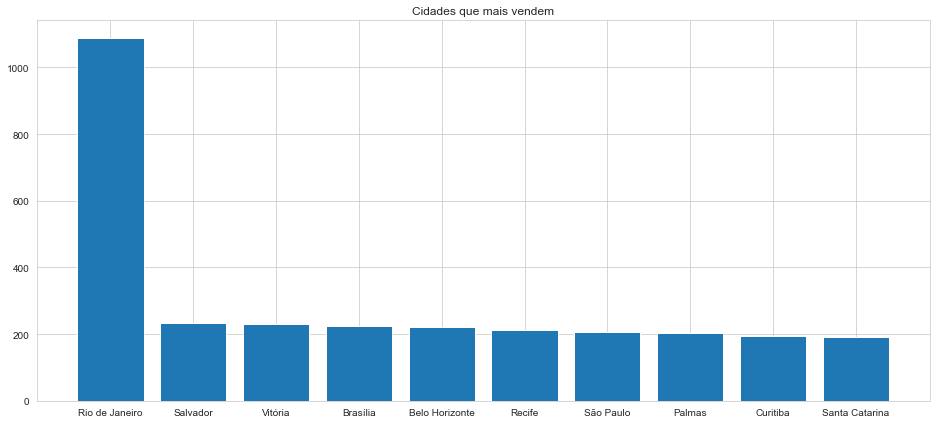

In [40]:
plt.figure(figsize=(16,7))
sns.set_style('whitegrid')
plt.bar(cidades_mais_vendem.index, cidades_mais_vendem.values)
plt.title('Cidades que mais vendem')

Text(0.5, 1.0, 'Produtos que mais vendem')

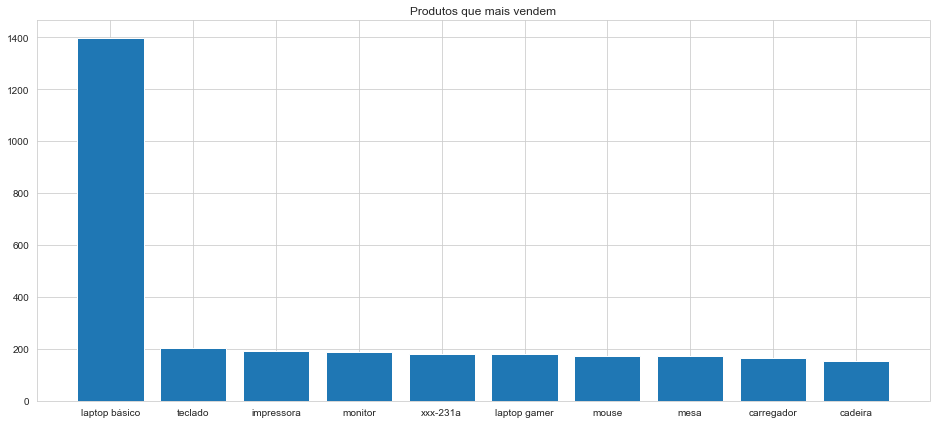

In [41]:
produtos_m_vendem = df.groupby('produto_produto').count().produto_valor.sort_values(ascending=False)

plt.figure(figsize=(16,7))
plt.bar(produtos_m_vendem.index, produtos_m_vendem.values)
plt.title('Produtos que mais vendem')

### Vendas por cidade

In [42]:
vendas_p_cidade = df.groupby('loja_cidade').produto_valor.sum().sort_values(ascending=False)

In [43]:
vendas_p_cidade.astype(int)

loja_cidade
Rio de Janeiro    1797906
Brasília           377983
Belo Horizonte     375722
Salvador           375238
Vitória            365584
São Paulo          340757
Recife             332923
Palmas             316837
Santa Catarina     313331
Curitiba           303240
Name: produto_valor, dtype: int32

O maior valor é R$ 1,797,906.98 e a média dos demais é R$ 344,624.40


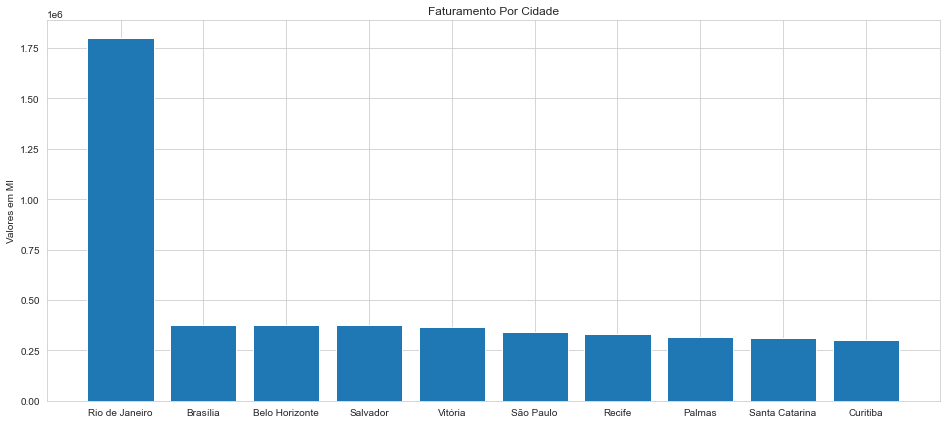

In [44]:
plt.figure(figsize=(16,7))
plt.bar(vendas_p_cidade.index, vendas_p_cidade.values)
plt.title('Faturamento Por Cidade')
plt.ylabel('Valores em MI')
print(f'O maior valor é R$ {vendas_p_cidade.max():9,.2f} e a média dos demais é R$ {vendas_p_cidade[vendas_p_cidade!=vendas_p_cidade.max()].mean():6,.2f}')

### Faturamento por cliente

In [45]:
faturamento_cliente = df[['cliente_nome','produto_valor']].groupby('cliente_nome').sum().produto_valor.sort_values(ascending=False)

In [46]:
print(f'{faturamento_cliente.astype(int).head(10)}')

cliente_nome
Leila Costa         28970
Melissa Lima        25892
Lavinia Carvalho    25261
Fernanda Pinto      24660
Felipe Castro       22920
Sem Nome            21721
Luana Pinto         20881
Melissa Ferreira    20470
Yasmin Silva        19890
Kauan Almeida       19762
Name: produto_valor, dtype: int32


Text(0.5, 1.0, 'Faturamento por Cliente')

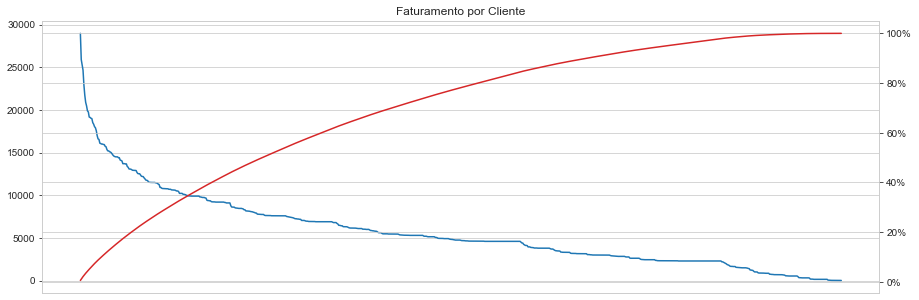

In [47]:
from matplotlib.ticker import PercentFormatter

fig, ax = plt.subplots(figsize=(15,5))
ax.plot(faturamento_cliente.index, faturamento_cliente.values, color='C0')
ax2 = ax.twinx()
ax2.plot(faturamento_cliente.index, faturamento_cliente.values.cumsum()/faturamento_cliente.values.sum()*100, color='C3')
ax2.yaxis.set_major_formatter(PercentFormatter())
ax2.axes.get_xaxis().set_visible(False)
ax.axes.get_xaxis().set_visible(False)
plt.title('Faturamento por Cliente')

### Faturamento por produto

Text(0.5, 1.0, 'Pareto de receita por produto \nValores em Mi')

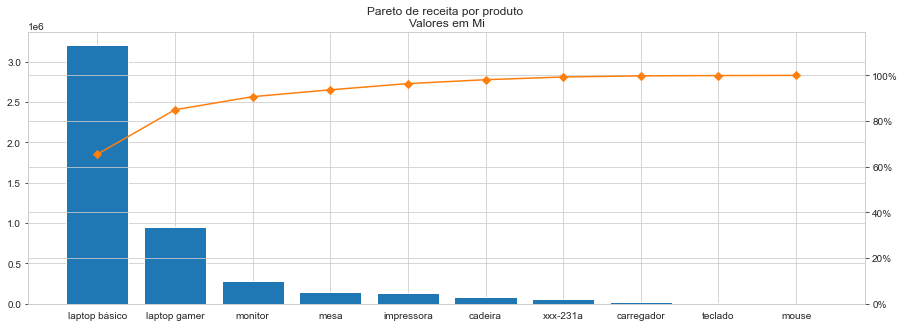

In [48]:
faturamento_produto = df[['produto_produto','produto_valor']].groupby('produto_produto').sum().produto_valor.sort_values(ascending=False)
fig, ax = plt.subplots(figsize=(15,5))
ax.bar(faturamento_produto.index, faturamento_produto.values, color='C0')
ax2 = ax.twinx()
ax2.plot(faturamento_produto.index, faturamento_produto.values.cumsum()/faturamento_produto.values.sum()*100, color='C1', marker='D')
ax2.yaxis.set_major_formatter(PercentFormatter())
plt.ylim(0,119)
plt.title('Pareto de receita por produto \nValores em Mi')

In [49]:
faturamento_produto.astype(int)

produto_produto
laptop básico    3208500
laptop gamer      954000
monitor           280500
mesa              147060
impressora        133700
cadeira            83160
xxx-231a           58446
carregador         24600
teclado             6120
mouse               3440
Name: produto_valor, dtype: int32

## Análise de tempo

### Tempo médio de pagamento

In [50]:
df

,id_cliente,id_loja,id_produto,dt_venda,cliente_nome,cliente_sexo,cliente_dt_nasc,loja_cidade,produto_produto,produto_valor,dt_pgto,pg,tempo_pg,cliente_idade
id,,,,,,,,,,,,,,
1,393,9,3,2018-01-04,Gustavo Silva,M,1950-01-04,Palmas,laptop básico,2300.0,2018-01-24,1,20.0,71.0
2,417,9,3,2018-01-04,Leonor Almeida,F,1972-01-31,Palmas,laptop básico,2300.0,2018-02-17,1,44.0,49.0
3,374,7,8,2018-01-04,André Alves,M,1962-08-03,Salvador,cadeira,540.0,2018-02-14,1,41.0,59.0
4,59,4,3,2018-01-05,Rodrigo Ribeiro,M,1941-11-05,Belo Horizonte,laptop básico,2300.0,NaT,0,NaN,80.0
5,18,9,1,2018-01-05,Antônio Azevedo,M,1941-04-15,Palmas,mouse,20.0,2018-01-23,1,18.0,80.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2996,671,3,7,2020-09-27,Ana Goncalves,F,1999-10-31,Curitiba,carregador,150.0,2020-10-17,1,20.0,22.0
2997,586,8,3,2020-09-27,Aline Pinto,F,1994-03-29,Brasília,laptop básico,2300.0,2020-10-02,1,5.0,27.0
2998,731,2,4,2020-09-27,Otávio Silva,M,1986-05-04,Rio de Janeiro,laptop gamer,5300.0,NaT,0,NaN,35.0


In [51]:
df.tempo_pg.mean()

22.47200772200772

Text(0.5, 1.0, 'Tempo de pagamento')

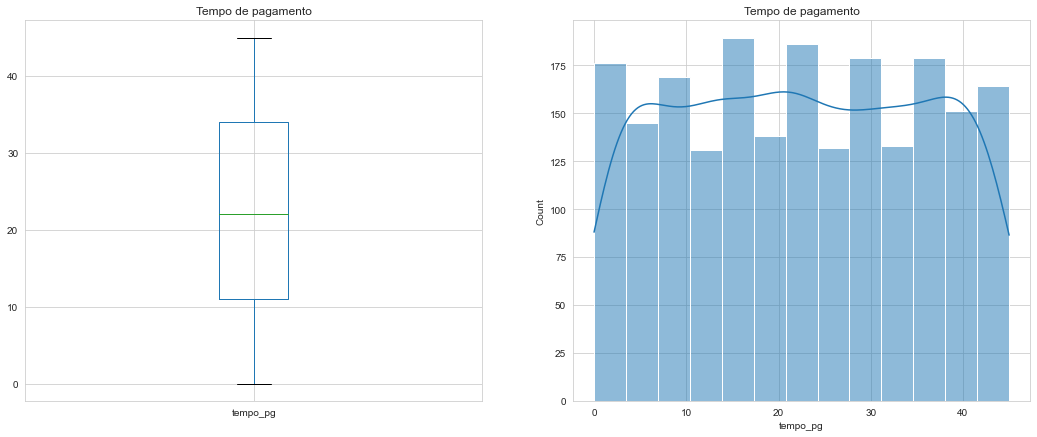

In [52]:
plt.figure(figsize=(18, 7))

plt.subplot(1,2,1)
df.boxplot('tempo_pg')
plt.title('Tempo de pagamento')

plt.subplot(1,2,2)
sns.histplot(data=df.tempo_pg, kde=True)
plt.title('Tempo de pagamento')

In [53]:
df.tempo_pg.describe()

count    2072.000000
mean       22.472008
std        13.256384
min         0.000000
25%        11.000000
50%        22.000000
75%        34.000000
max        45.000000
Name: tempo_pg, dtype: float64

### Tempo de pagamento por cidade e produto

In [54]:
df.groupby('loja_cidade').tempo_pg.mean()

loja_cidade
Belo Horizonte    21.430939
Brasília          22.269430
Curitiba          23.550898
Palmas            23.294444
Recife            22.301075
Rio de Janeiro    23.363855
Salvador          21.644860
Santa Catarina    19.769231
São Paulo         23.087432
Vitória           22.710660
Name: tempo_pg, dtype: float64

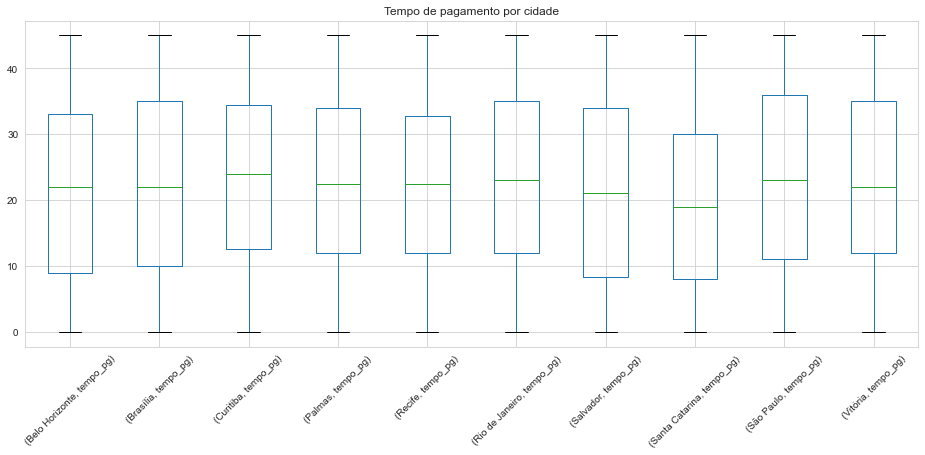

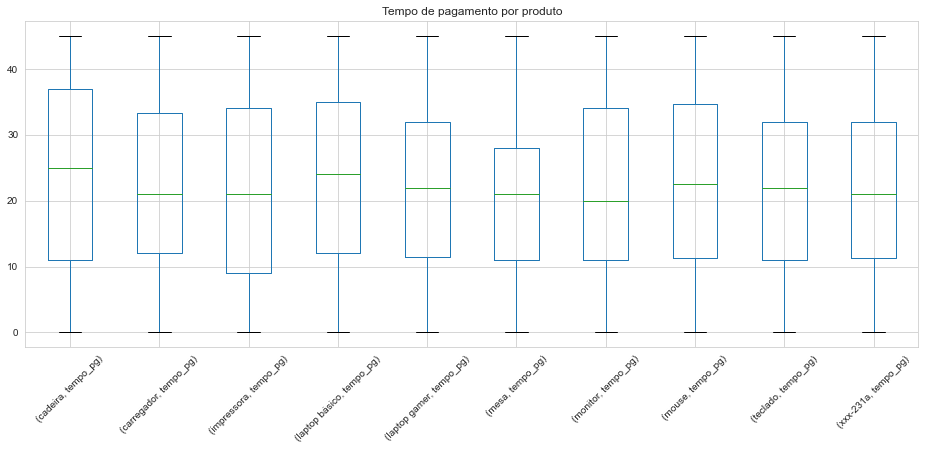

In [90]:
plt.figure(figsize=(16, 6))
df[['loja_cidade', 'tempo_pg']].groupby('loja_cidade').boxplot('tempo_pg')
plt.title('Tempo de pagamento por cidade')
plt.xticks(rotation=45)
plt.show()

plt.figure(figsize=(16, 6))
df[['produto_produto', 'tempo_pg']].groupby('produto_produto').boxplot('tempo_pg')
plt.title('Tempo de pagamento por produto')
plt.xticks(rotation=45)
plt.show()

## Análise sazonalidade

In [91]:
df

,id_cliente,id_loja,id_produto,dt_venda,cliente_nome,cliente_sexo,cliente_dt_nasc,loja_cidade,produto_produto,produto_valor,dt_pgto,pg,tempo_pg,cliente_idade
id,,,,,,,,,,,,,,
1,393,9,3,2018-01-04,Gustavo Silva,M,1950-01-04,Palmas,laptop básico,2300.0,2018-01-24,1,20.0,71.0
2,417,9,3,2018-01-04,Leonor Almeida,F,1972-01-31,Palmas,laptop básico,2300.0,2018-02-17,1,44.0,49.0
3,374,7,8,2018-01-04,André Alves,M,1962-08-03,Salvador,cadeira,540.0,2018-02-14,1,41.0,59.0
4,59,4,3,2018-01-05,Rodrigo Ribeiro,M,1941-11-05,Belo Horizonte,laptop básico,2300.0,NaT,0,NaN,80.0
5,18,9,1,2018-01-05,Antônio Azevedo,M,1941-04-15,Palmas,mouse,20.0,2018-01-23,1,18.0,80.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2996,671,3,7,2020-09-27,Ana Goncalves,F,1999-10-31,Curitiba,carregador,150.0,2020-10-17,1,20.0,22.0
2997,586,8,3,2020-09-27,Aline Pinto,F,1994-03-29,Brasília,laptop básico,2300.0,2020-10-02,1,5.0,27.0
2998,731,2,4,2020-09-27,Otávio Silva,M,1986-05-04,Rio de Janeiro,laptop gamer,5300.0,NaT,0,NaN,35.0


In [96]:
media_movel_d30 = df[['produto_valor','dt_venda']].groupby('dt_venda').sum().rolling(30).mean()

<ipython-input-106-3ee64849c989>:3: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


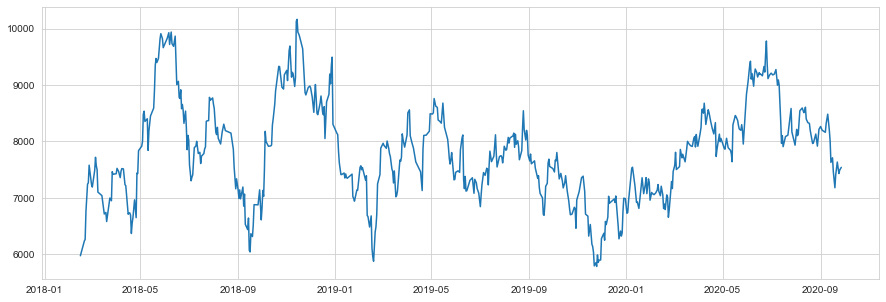

In [106]:
plt.figure(figsize=(15,5))
plt.plot(media_movel_d30.index, media_movel_d30.values)
fig.show()

In [57]:
#df.to_excel('analise.xlsx', sheet_name='Analise', na_rep='NaN', header=True, index=False)